In [1]:
def print_info_about_data(train_data,test_data,train_labels,test_labels):
    print("Number of training examples : " , train_data.shape[0])
    print("Number of testing examples : " , test_data.shape[0])
    print("Number of features : " , test_data.shape[1])
    print("Shape of training data : ", train_data.shape)
    print("Shape of testing data : ", test_data.shape)
    print("Shape of training labels : ", train_labels.shape)
    print("Shape of testing labels : ", test_labels.shape)

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as file_handle:
        dict = pickle.load(file_handle, encoding='bytes')
    return dict

In [3]:
def one_hot_matrix(labels,nclasses = 10):
    res = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        res[i,int(l)] = 1
    return res  

In [4]:
def show_sample(train_data,train_labels,index_of_data,label_dict):
    data = train_data[index_of_data]
    label = train_labels[index_of_data,:]   
    im = np.reshape(data,[3,32,32]).transpose(1,2,0)
    plt.figure(figsize=(1,1))
    plt.title('Input is %s'%label_dict[np.argmax(label)])
    plt.imshow(im,interpolation='nearest')
    plt.show()

In [5]:
def compute_accuracy(input_data,input_labels):
    correct_prediction = tf.equal(tf.argmax(yhat,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    return round(accuracy.eval(feed_dict = {x:input_data,y:input_labels, keep_prob: 1.0})*100,2)

Number of training examples :  50000
Number of testing examples :  10000
Number of features :  3072
Shape of training data :  (50000, 3072)
Shape of testing data :  (10000, 3072)
Shape of training labels :  (50000, 10)
Shape of testing labels :  (10000, 10)


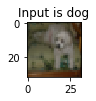

First convolved and max pooled image size :  (?, 16, 16, 32)
Final pooled image size :  4096

Iteration number :  0
Cost :  2.68869256973
Training accuracy : 9.92 Testing accuracy : 10.1

Iteration number :  1

Iteration number :  2

Iteration number :  3

Iteration number :  4

Iteration number :  5
Cost :  1.49193954468
Training accuracy : 48.29 Testing accuracy : 47.94

Iteration number :  6

Iteration number :  7

Iteration number :  8

Iteration number :  9

Iteration number :  10
Cost :  1.3629052639
Training accuracy : 52.68 Testing accuracy : 51.66

Iteration number :  11

Iteration number :  12

Iteration number :  13

Iteration number :  14

Iteration number :  15
Cost :  1.28658545017
Training accuracy : 55.51 Testing accuracy : 53.9

Iteration number :  16

Iteration number :  17

Iteration number :  18

Iteration number :  19

Iteration number :  20
Cost :  1.24441421032
Training accuracy : 57.16 Testing accuracy : 55.31

Iteration number :  21

Iteration number :  22

Ite

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as math
import csv

#LOAD INPUT
input_train_dict1 = unpickle('cifar-10-batches-py/data_batch_1')
input_train_dict2 = unpickle('cifar-10-batches-py/data_batch_2')
input_train_dict3 = unpickle('cifar-10-batches-py/data_batch_3')
input_train_dict4 = unpickle('cifar-10-batches-py/data_batch_4')
input_train_dict5 = unpickle('cifar-10-batches-py/data_batch_5')
input_test_dict = unpickle('cifar-10-batches-py/test_batch')

#PRE PROCESS INPUT
train_data1,train_labels1 = input_train_dict1[b'data']/255,input_train_dict1[b'labels']
train_data2,train_labels2 = input_train_dict2[b'data']/255,input_train_dict2[b'labels']
train_data3,train_labels3 = input_train_dict3[b'data']/255,input_train_dict3[b'labels']
train_data4,train_labels4 = input_train_dict4[b'data']/255,input_train_dict4[b'labels']
train_data5,train_labels5 = input_train_dict5[b'data']/255,input_train_dict5[b'labels']

train_data = np.vstack((train_data1,train_data2,train_data3,train_data4,train_data5))
train_labels = train_labels1 + train_labels2 + train_labels3 + train_labels4 + train_labels5
test_data,test_labels = input_test_dict[b'data']/255,input_test_dict[b'labels']
processed_train_labels = one_hot_matrix(train_labels)
processed_test_labels = one_hot_matrix(test_labels)

#PRINT INFO ABOUT THE DATA
print_info_about_data(train_data,test_data,processed_train_labels,processed_test_labels)

#SHOW SAMPLE DATA
label_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
show_sample(train_data,processed_train_labels,np.random.randint(train_data.shape[0]),label_dict)

#INITIALIZE VARIABLES AND PLACEHOLDERS
beta = 0.005
winx1 = 3
winy1 = 3
winx2 = 3
winy2 = 3
keep_prob = tf.placeholder("float")
num_filter1 = 32
num_filter2 = 64
num_hidden_units = 128
x = tf.placeholder("float", [None,3072])
y = tf.placeholder("float", [None,10])
W1 = tf.Variable(tf.truncated_normal([winx1, winy1,3, num_filter1],stddev=1./math.sqrt(winx1*winy1)))
b1 = tf.Variable(tf.constant(0.1,shape=[num_filter1]))
W2 = tf.Variable(tf.truncated_normal([winx2, winy2,num_filter1, num_filter2],stddev=1./math.sqrt(winx2*winy2)))
b2 = tf.Variable(tf.constant(0.1,shape=[num_filter2]))

b3 = tf.Variable(tf.zeros([num_hidden_units]))
W4 = tf.Variable(tf.truncated_normal([num_hidden_units,10],stddev=1./math.sqrt(num_hidden_units)))
b4 = tf.Variable(tf.zeros([10]))

#CONVOLUTIONAL NEURAL NET EQUATIONS
x_image = tf.reshape(x,[-1,32,32,3])
x_convolved_image1 = tf.nn.conv2d(x_image, W1,strides=[1, 1, 1, 1],padding='SAME')
x_conv_activated1 = tf.nn.relu(x_convolved_image1 + b1)
x_max_pooled1 = tf.nn.max_pool(x_conv_activated1, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='VALID')
print("First convolved and max pooled image size : ",x_max_pooled1.get_shape())
x_convolved_image2 = tf.nn.conv2d(x_max_pooled1, W2,strides=[1, 1, 1, 1],padding='SAME')
x_conv_activated2 = tf.nn.relu(x_convolved_image2 + b2)
x_max_pooled2 = tf.nn.max_pool(x_conv_activated2, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='VALID')
pooled_image_size = np.product([s.value for s in x_max_pooled2.get_shape()[1:]])

print("Final pooled image size : ", pooled_image_size )
x_pooled_reshaped = tf.reshape(x_max_pooled2, [-1, pooled_image_size ])
W3 = tf.Variable(tf.truncated_normal([pooled_image_size,num_hidden_units],stddev=1./math.sqrt(pooled_image_size)))
a1 = tf.nn.relu(tf.matmul(x_pooled_reshaped,W3) + b3)
a1_drop = tf.nn.dropout(a1, keep_prob)
yhat = tf.matmul(a1_drop,W4) + b4
cross_entropy_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yhat,labels = y))
regularizer1 = tf.nn.l2_loss(W1)
regularizer2 = tf.nn.l2_loss(W2)
cost = tf.reduce_mean(cross_entropy_cost + beta * regularizer1 + beta * regularizer2)
optimization_step = tf.train.AdamOptimizer(0.0005).minimize(cost)
   
#CREATE SESSION AND INITIALIZE IT
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#RUN GRADIENT DESCENT
epochs = 200
print_interval=5
minibatch_size=1000
train_acc = np.zeros(epochs//print_interval) 
test_acc = np.zeros(epochs//print_interval)
cost = np.zeros(epochs//print_interval)
k=0
for i in range(epochs):
    print("\nIteration number : " , i)
    if(i%print_interval == 0):
        cost[k] = sess.run(cross_entropy_cost,feed_dict = {x: train_data,y: processed_train_labels, keep_prob: 1.0})
        train_acc[k] = compute_accuracy(train_data,processed_train_labels)
        test_acc[k] = compute_accuracy(test_data,processed_test_labels)       
        print("Cost : " , cost[k])       
        print("Training accuracy :" ,train_acc[k],"Testing accuracy :" ,test_acc[k]) 
        k+=1
    for j in range(train_data.shape[0]//minibatch_size):#converts to the lowest integer
        #print("      In for minibatch : ",j , " (",j*minibatch_size,",",(j+1)*minibatch_size,")")
        train_data_mini = train_data[j*minibatch_size:(j+1)*minibatch_size,:]
        processed_train_labels_mini = processed_train_labels[j*minibatch_size:(j+1)*minibatch_size]
        sess.run(optimization_step,feed_dict={ x: train_data_mini,y: processed_train_labels_mini,keep_prob: 0.9})
        
#PLOT COST, TRAINING AND TEST ACCURACY
# Plot the accuracy curves
plt.figure(figsize=(6,6))
plt.title("Train and Test accuracy")
plt.plot(train_acc,'b-')
plt.plot(test_acc,'r-')

# Plot the confusion matrix
pred = np.argmax(yhat.eval(feed_dict={x:test_data,keep_prob: 1.0}), axis = 1)
confusion_matrix = np.zeros([10,10])
for p,t in zip(pred,np.argmax(processed_test_labels,axis=1)):
    confusion_matrix[t,p] += 1
plt.matshow(confusion_matrix)
plt.colorbar()
plt.show()

#TESTING WITH SAMPLE IMAGE
test_output_index = np.random.randint(test_data.shape[0])
show_sample(test_data,processed_test_labels,test_output_index,label_dict)
print("Output is: ",label_dict[np.argmax(sess.run(yhat,feed_dict={x:test_data[test_output_index:test_output_index+1,:],keep_prob: 1.0}))])